# Spectral Clustering

### In spectral clustering, data points are treated as nodes of a graph. Thus, spectral clustering is a graph partitioning problem. The nodes are then mapped to a low-dimensional space that can be easily segregated to form clusters. No assumption is made about the shape/form of the clusters. The goal of spectral clustering is to cluster data that is connected but not necessarily compact or clustered within convex boundaries.

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.cluster import SpectralClustering 
from sklearn.preprocessing import StandardScaler, normalize 
from sklearn.decomposition import PCA 
from sklearn.metrics import silhouette_score 

In [2]:
raw_df = pd.read_csv('finalDataset.csv')

raw_df = raw_df.sample(n=10000, random_state=69)
withId = raw_df
raw_df = raw_df.drop('id', axis = 1) 
raw_df

,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,year
36323,0,0.4300,0.768,5,-8.275,1,0.0882,0.235000,0.004660,0.2610,0.450,148.275,158227,4,2006
28232,0,0.4940,0.337,2,-14.888,1,0.0258,0.227000,0.698000,0.0692,0.385,138.832,337240,3,1996
90488,0,0.5630,0.264,7,-11.332,1,0.0288,0.490000,0.023400,0.1290,0.167,76.989,217227,4,2001
28289,0,0.4750,0.837,9,-4.705,0,0.0369,0.128000,0.000846,0.2620,0.698,148.053,173560,4,2006
12007,0,0.4510,0.163,4,-21.492,1,0.0409,0.555000,0.018800,0.1310,0.431,139.197,366960,4,1989
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79735,0,0.6180,0.541,0,-9.233,0,0.0584,0.600000,0.000496,0.1710,0.773,121.384,262453,4,2013
71490,1,0.4840,0.637,1,-4.603,0,0.0801,0.000008,0.819000,0.5810,0.328,94.771,82333,4,2007
33439,0,0.7080,0.550,0,-12.591,1,0.2810,0.278000,0.359000,0.1230,0.407,174.991,238613,4,2004
90112,0,0.0843,0.259,5,-16.884,1,0.0366,0.000557,0.928000,0.1690,0.026,84.775,670138,4,2013


In [3]:
# Preprocessing the data to make it visualizable 
  
# Scaling the Data 
scaler = StandardScaler() 
X_scaled = scaler.fit_transform(raw_df) 
  
# Normalizing the Data 
X_normalized = normalize(X_scaled) 
  
# Converting the numpy array into a pandas DataFrame 
X_normalized = pd.DataFrame(X_normalized) 
  
# Reducing the dimensions of the data 
pca = PCA(n_components = 2) 
X_principal = pca.fit_transform(X_normalized) 
X_principal = pd.DataFrame(X_principal) 
X_principal.columns = ['P1', 'P2'] 
  
X_principal.head(2) 

,P1,P2
0,0.591792,0.001664
1,-0.377485,0.077285


> Building the clustering model and Visualizing the clustering

> Affinity = rbf

In [4]:
import joblib

# Building the clustering model 
spectral_model_rbf = SpectralClustering(n_clusters = 2, affinity ='rbf') 
  
# Training the model and Storing the predicted cluster labels 
labels_rbf = spectral_model_rbf.fit_predict(X_principal)

modelFilename = 'spectral_model_rbf.joblib'
joblib.dump(spectral_model_rbf, modelFilename)

['spectral_model_rbf.joblib']

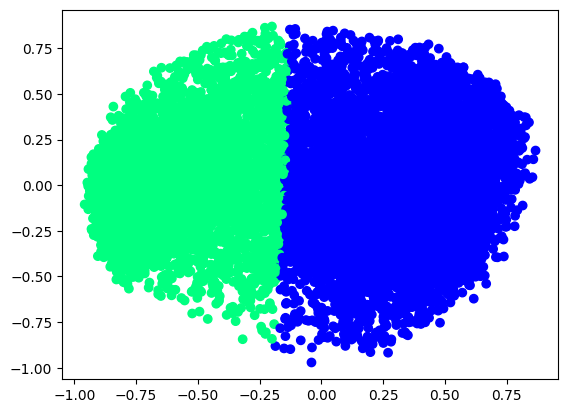

In [5]:
# Visualizing the clustering 
plt.scatter(X_principal['P1'], X_principal['P2'],  
           c = SpectralClustering(n_clusters = 2, affinity ='rbf') .fit_predict(X_principal), cmap =plt.cm.winter) 
plt.show() 

> Affinity = nearest neighbours

In [6]:
import joblib
#Building the clustering model 
spectral_model_nn = SpectralClustering(n_clusters = 2, affinity ='nearest_neighbors') 
  
# Training the model and Storing the predicted cluster labels 
labels_nn = spectral_model_nn.fit_predict(X_principal)

model_file_name = 'spectral_model_nn.joblib'
joblib.dump(spectral_model_nn, model_file_name)

['spectral_model_nn.joblib']

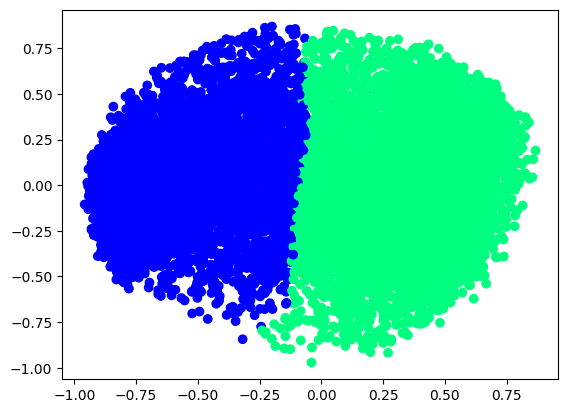

In [7]:
# Visualizing the clustering 
plt.scatter(X_principal['P1'], X_principal['P2'],  
           c = SpectralClustering(n_clusters = 2, affinity ='nearest_neighbors') .fit_predict(X_principal), cmap =plt.cm.winter) 
plt.show() 

> Performance Evaluation

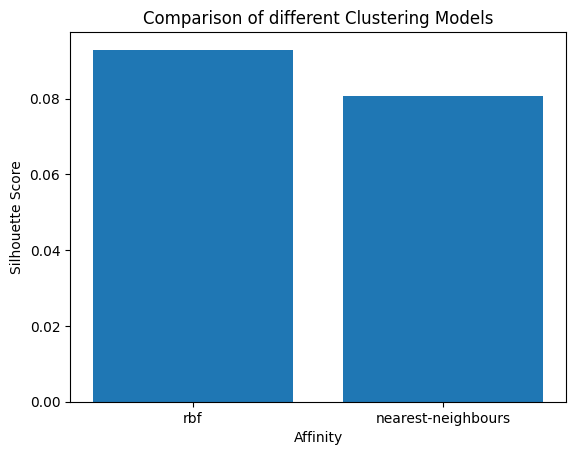

[0.09294108892031763, 0.08071361131007894]


In [8]:
# List of different values of affinity 
affinity = ['rbf', 'nearest-neighbours'] 
  
# List of Silhouette Scores 
s_scores = [] 
  
# Evaluating the performance 
s_scores.append(silhouette_score(raw_df, labels_rbf)) 
s_scores.append(silhouette_score(raw_df, labels_nn)) 
  
# Plotting a Bar Graph to compare the models 
plt.bar(affinity, s_scores) 
plt.xlabel('Affinity') 
plt.ylabel('Silhouette Score') 
plt.title('Comparison of different Clustering Models') 
plt.show() 

print(s_scores)

> Using Nearest Neighbours since it has better silhoutte score

In [9]:
withId['clusterLabel'] = spectral_model_nn.labels_
withId

,id,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,year,clusterLabel
36323,6WI9F3P1EVJvaTavFWn7p5,0,0.4300,0.768,5,-8.275,1,0.0882,0.235000,0.004660,0.2610,0.450,148.275,158227,4,2006,1
28232,6bJmgpIELrGklnmswJ59br,0,0.4940,0.337,2,-14.888,1,0.0258,0.227000,0.698000,0.0692,0.385,138.832,337240,3,1996,0
90488,4Up2AJmO8k5TeQHutZ4Wjn,0,0.5630,0.264,7,-11.332,1,0.0288,0.490000,0.023400,0.1290,0.167,76.989,217227,4,2001,0
28289,5xKxCFc2csZbSTgaUJQBX4,0,0.4750,0.837,9,-4.705,0,0.0369,0.128000,0.000846,0.2620,0.698,148.053,173560,4,2006,1
12007,2yEyx1KalJj5ltsYStkjaQ,0,0.4510,0.163,4,-21.492,1,0.0409,0.555000,0.018800,0.1310,0.431,139.197,366960,4,1989,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79735,3KbljSkNBaNGdyIw1O04XW,0,0.6180,0.541,0,-9.233,0,0.0584,0.600000,0.000496,0.1710,0.773,121.384,262453,4,2013,1
71490,6W0KQbGK1SRcVvL1pIhfPV,1,0.4840,0.637,1,-4.603,0,0.0801,0.000008,0.819000,0.5810,0.328,94.771,82333,4,2007,1
33439,0ed9PYwOuzDxe9XdBBFZK4,0,0.7080,0.550,0,-12.591,1,0.2810,0.278000,0.359000,0.1230,0.407,174.991,238613,4,2004,1
90112,5DMIcoqiJUb0znq0vqZocA,0,0.0843,0.259,5,-16.884,1,0.0366,0.000557,0.928000,0.1690,0.026,84.775,670138,4,2013,0


In [10]:
def recommend_songs(input_song_id, num_recommendations=5):
    # Find the cluster label of the input song
    input_song_cluster = withId.loc[withId['id'] == input_song_id, 'clusterLabel']

    if input_song_cluster.empty:
        raise ValueError(f"Song ID '{input_song_id}' not found in the dataset.")
    
    # Extract the cluster label value
    input_song_cluster = input_song_cluster.values[0]

    # Extract songs from the same cluster, excluding the input song itself
    recommended_songs = withId.loc[
        (withId['clusterLabel'] == input_song_cluster) & (withId['id'] != input_song_id),
        'id'
    ].head(num_recommendations).tolist()

    return recommended_songs

In [11]:
input_song_id = '4Up2AJmO8k5TeQHutZ4Wjn'  # Replace with a valid song ID from your dataset
recommended_songs = recommend_songs(input_song_id, num_recommendations=5)

# Display the recommended songs
print("Recommended Songs:")
print(recommended_songs)

Recommended Songs:
['6bJmgpIELrGklnmswJ59br', '2yEyx1KalJj5ltsYStkjaQ', '2Vq1aEwYcO1ptVDfgIVY3b', '0ohdvzRGeUSfGl8e122wND', '4UGiOPruZV1HQpHC3hfifm']


In [12]:
import pandas as pd
recommended_songs= ['6bJmgpIELrGklnmswJ59br', '2yEyx1KalJj5ltsYStkjaQ', '2Vq1aEwYcO1ptVDfgIVY3b', '0ohdvzRGeUSfGl8e122wND', '4UGiOPruZV1HQpHC3hfifm']
tmp = pd.read_csv('tracks_features.csv')
#list the songs with the above ids
tmp[tmp['id'].isin(recommended_songs)]

,id,name,album,album_id,artists,artist_ids,track_number,disc_number,explicit,danceability,...,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,year,release_date
12007,2yEyx1KalJj5ltsYStkjaQ,Viola Fora De Moda,Rio After Dark,69g1tE4lMYFlmse8PHkiyu,['Ana Caram'],['6wo2wDOKUSRpTSB7c21DyV'],4,1,False,0.451,...,0.0409,0.555,0.018800,0.1310,0.4310,139.197,366960,4,1989,08-09-1989
12823,4UGiOPruZV1HQpHC3hfifm,"Fantasiestücke, Op. 12: 6. Fabel","Rubinstein Collection, Vol. 51: All Schumann: ...",6lO5aFrY30sDgnGisdn259,"['Robert Schumann', 'Arthur Rubinstein']","['2UqjDAXnDxejEyE0CzfUrZ', '5N1GUHhFMRFFgMTjSO...",27,1,False,0.513,...,0.0538,0.995,0.945000,0.0922,0.1420,99.466,153227,4,1999,12-10-1999
28232,6bJmgpIELrGklnmswJ59br,"Faith, Hope, and Love",The Dare of An Angel,0AHO9BMS30OP0mTQKHvCa3,['Michael Gulezian'],['5FqzOo3S4RpuBZOd88UiLx'],1,1,False,0.494,...,0.0258,0.227,0.698000,0.0692,0.3850,138.832,337240,3,1996,01-01-1996
47902,0ohdvzRGeUSfGl8e122wND,Nothing Else Matters,Music for Harp,5aCsIdN72dqKDdJqx4XGsC,['Carol Tatum'],['2BeA7yh0fHX7BcWYV9RjQ2'],1,1,False,0.501,...,0.0321,0.913,0.832000,0.1050,0.0922,138.366,295387,3,2001,13-01-2001
77412,2Vq1aEwYcO1ptVDfgIVY3b,Joyful Girl,Canon,0FVacG2xU5vOnFyrIg8o9F,['Ani DiFranco'],['0AiTwNtYX8m4uhfU7rJ8RD'],13,1,False,0.528,...,0.0531,0.394,0.000026,0.1060,0.1130,108.325,269773,4,2007,11-09-2007
